In [139]:
from bs4 import BeautifulSoup as bs
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import requests
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


In [140]:
source = requests.get("https://genius.com/a/read-all-the-lyrics-to-futures-new-album-i-never-liked-you").text 
soup = bs(source, "lxml")
print(soup.prettify) # will give the html of the website

<bound method Tag.prettify of <!DOCTYPE html>
<html class="snarly song_stories_public_launch--enabled react_forums--disabled report_abuse--disabled metadata_question_page_released_to_public--disabled" lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml">
<head>
<base href="//genius.com/" target="_top"/>
<script type="text/javascript">
//<![CDATA[

  var _sf_startpt=(new Date()).getTime();
  if (window.performance && performance.mark) {
    window.performance.mark('parse_start');
  }

//]]>
</script>
<title>Read All The Lyrics To Future’s New Album ‘I NEVER LIKED YOU’ | Genius</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="app-id=709482991" name="apple-itunes-app"/>
<link href="https://assets.genius.com/images/apple-touch-icon.png?1682093673" rel="apple-touch-icon"/>
<link href="https://assets.genius.com/images/apple-touch

# scrapping: extracting necessary information

we abserve the location in which the information need is placed

In [141]:

for i in soup.find_all("ol"):
    print(i)

<ol>
<li><a data-api_path="/songs/7409800" href="https://genius.com/Future-712pm-lyrics" rel="noopener">“7:12PM”</a></li>
<li><a data-api_path="/songs/7884425" href="https://genius.com/Future-im-dat-nigga-lyrics" rel="noopener">“I’M DAT NIGGA”</a></li>
<li>
<a data-api_path="/songs/7717638" href="https://genius.com/Future-keep-it-burnin-lyrics" rel="noopener">“KEEP IT BURNIN”</a> (Feat. Kanye West)</li>
<li>
<a data-api_path="/songs/6789234" href="https://genius.com/Future-for-a-nut-lyrics" rel="noopener">“FOR A NUT”</a> (Feat. Young Thug &amp; Gunna)</li>
<li><a data-api_path="/songs/7418183" href="https://genius.com/Future-puffin-on-zootiez-lyrics" rel="noopener">“PUFFIN ON ZOOTIEZ”</a></li>
<li><a data-api_path="/songs/7934053" href="https://genius.com/Future-gold-stacks-lyrics" rel="noopener">“GOLD STACKS”</a></li>
<li>
<a data-api_path="/songs/7945037" href="https://genius.com/Future-wait-for-u-lyrics" rel="noopener">“WAIT FOR U”</a> (Feat Drake &amp; Tems)</li>
<li><a data-api_pa

In [142]:
link = soup.find("ol").a # we do a brief test to observe everything is working 
link.text

'“7:12PM”'

Now we proceed to add all the songs titles into a list

In [143]:
titles = []
for i in soup.find_all("ol"):
    title = i.text.split("\n")
    titles.append(title)
titles

[['',
  '“7:12PM”',
  '“I’M DAT NIGGA”',
  '',
  '“KEEP IT BURNIN” (Feat. Kanye West)',
  '',
  '“FOR A NUT” (Feat. Young Thug & Gunna)',
  '“PUFFIN ON ZOOTIEZ”',
  '“GOLD STACKS”',
  '',
  '“WAIT FOR U” (Feat Drake & Tems)',
  '“LOVE YOU BETTER”',
  '“MASSAGING ME”',
  '',
  '“CHICKENS” (Feat. Est Gee)',
  '“WE JUS WANNA GET HIGH”',
  '',
  '“VOODOO” (Feat. Kodak Black)',
  '“HOLY GHOST”',
  '“THE WAY THINGS GOING”',
  '',
  '“I’M ON ONE” (Feat. Drake)',
  '“BACK TO THE BASICS”',
  '']]

We use pandas to save the titles and now you can choose if you want to agroup them by rows or columns

In [144]:
df = pd.DataFrame(titles)
df = df.rename(columns=lambda x: 'cancion')
df

cancion   cancion          cancion cancion  \
0          “7:12PM”  “I’M DAT NIGGA”           

                               cancion cancion  \
0  “KEEP IT BURNIN” (Feat. Kanye West)           

                                  cancion              cancion        cancion  \
0  “FOR A NUT” (Feat. Young Thug & Gunna)  “PUFFIN ON ZOOTIEZ”  “GOLD STACKS”   

  cancion  ...                     cancion                  cancion cancion  \
0          ...  “CHICKENS” (Feat. Est Gee)  “WE JUS WANNA GET HIGH”           

                        cancion       cancion                 cancion cancion  \
0  “VOODOO” (Feat. Kodak Black)  “HOLY GHOST”  “THE WAY THINGS GOING”           

                      cancion               cancion cancion  
0  “I’M ON ONE” (Feat. Drake)  “BACK TO THE BASICS”          

[1 rows x 24 columns]

In [145]:
for i in titles: # i prefer rows so i save it in the df as rows 
    df = pd.DataFrame({"canciones":i})
df

canciones
0                                         
1                                 “7:12PM”
2                          “I’M DAT NIGGA”
3                                         
4      “KEEP IT BURNIN” (Feat. Kanye West)
5                                         
6   “FOR A NUT” (Feat. Young Thug & Gunna)
7                      “PUFFIN ON ZOOTIEZ”
8                            “GOLD STACKS”
9                                         
10        “WAIT FOR U” (Feat Drake & Tems)
11                       “LOVE YOU BETTER”
12                          “MASSAGING ME”
13                                        
14              “CHICKENS” (Feat. Est Gee)
15                 “WE JUS WANNA GET HIGH”
16                                        
17            “VOODOO” (Feat. Kodak Black)
18                            “HOLY GHOST”
19                  “THE WAY THINGS GOING”
20                                        
21              “I’M ON ONE” (Feat. Drake)
22                    “BACK TO THE BASICS”
23

In [146]:
df = df.drop(df.index [ [ 0,3,5,9,13,16,20,23 ] ]) # we clean the df
df.index = pd.RangeIndex(len(df.index)) # we set the new indexes 
df.index = range(len(df.index))
df

canciones
0                                 “7:12PM”
1                          “I’M DAT NIGGA”
2      “KEEP IT BURNIN” (Feat. Kanye West)
3   “FOR A NUT” (Feat. Young Thug & Gunna)
4                      “PUFFIN ON ZOOTIEZ”
5                            “GOLD STACKS”
6         “WAIT FOR U” (Feat Drake & Tems)
7                        “LOVE YOU BETTER”
8                           “MASSAGING ME”
9               “CHICKENS” (Feat. Est Gee)
10                 “WE JUS WANNA GET HIGH”
11            “VOODOO” (Feat. Kodak Black)
12                            “HOLY GHOST”
13                  “THE WAY THINGS GOING”
14              “I’M ON ONE” (Feat. Drake)
15                    “BACK TO THE BASICS”

Now we access the link for each song tittle

In [147]:
source = soup.find("ol").li.a["href"] # a brief example of how to get one 
source
    

'https://genius.com/Future-712pm-lyrics'

In [148]:
links = [] # we iterate over them a agroup them in a list
for i in soup.find_all("li"):
    links.append(i.a["href"])
print(len(links))

47


In [149]:
df_links = pd.DataFrame(links)
df_links

0
0                    https://www.facebook.com/Genius/
1                          https://twitter.com/Genius
2                   https://www.instagram.com/genius/
3                      https://www.youtube.com/genius
4              https://genius.com/Future-712pm-lyrics
5       https://genius.com/Future-im-dat-nigga-lyrics
6     https://genius.com/Future-keep-it-burnin-lyrics
7          https://genius.com/Future-for-a-nut-lyrics
8   https://genius.com/Future-puffin-on-zootiez-ly...
9        https://genius.com/Future-gold-stacks-lyrics
10        https://genius.com/Future-wait-for-u-lyrics
11   https://genius.com/Future-love-you-better-lyrics
12      https://genius.com/Future-massaging-me-lyrics
13          https://genius.com/Future-chickens-lyrics
14  https://genius.com/Future-we-jus-wanna-get-hig...
15            https://genius.com/Future-voodoo-lyrics
16        https://genius.com/Future-holy-ghost-lyrics
17  https://genius.com/Future-the-way-things-going...
18         https://genius.com/Future-im-on-one-lyrics
19  https://genius.com/Future-back-to-the-basics-l...
20                 https://genius.com/artists-index/a
21                 https://genius.com/artists-index/b
22                 https://genius.com/artists-index/c
23                 https://genius.com/artists-index/d
24                 https://genius.com/artists-index/e
25                 https://genius.com/artists-index/f
26                 https://genius.com/artists-index/g
27                 https://genius.com/artists-index/h
28                 https://genius.com/artists-index/i
29                 https://genius.com/artists-index/j
30                 https://genius.com/artists-index/k
31                 https://genius.com/artists-index/l
32                 https://genius.com/artists-index/m
33                 https://genius.com/artists-index/n
34                 https://genius.com/artists-index/o
35                 https://genius.com/artists-index/p
36                 https://genius.com/artists-index/q
37                 https://genius.com/artists-index/r
38                 https://genius.com/artists-index/s
39                 https://genius.com/artists-index/t
40                 https://genius.com/artists-index/u
41                 https://genius.com/artists-index/v
42                 https://genius.com/artists-index/w
43                 https://genius.com/artists-index/x
44                 https://genius.com/artists-index/y
45                 https://genius.com/artists-index/z
46                 https://genius.com/artists-index/0

Since the scraping for links was so general now we need to clean it 

In [150]:
df_links = df_links.drop(df_links.index[[0, 1, 2, 3, 20, 21, 22, 23, 24, 25, 26, 27 ,28 , 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40 ,41, 42, 43, 44, 45, 46 ]])

In [152]:
df_links.index = pd.RangeIndex(len(df_links.index))
df_links.index = range(len(df_links.index))
df_links

0
0              https://genius.com/Future-712pm-lyrics
1       https://genius.com/Future-im-dat-nigga-lyrics
2     https://genius.com/Future-keep-it-burnin-lyrics
3          https://genius.com/Future-for-a-nut-lyrics
4   https://genius.com/Future-puffin-on-zootiez-ly...
5        https://genius.com/Future-gold-stacks-lyrics
6         https://genius.com/Future-wait-for-u-lyrics
7    https://genius.com/Future-love-you-better-lyrics
8       https://genius.com/Future-massaging-me-lyrics
9           https://genius.com/Future-chickens-lyrics
10  https://genius.com/Future-we-jus-wanna-get-hig...
11            https://genius.com/Future-voodoo-lyrics
12        https://genius.com/Future-holy-ghost-lyrics
13  https://genius.com/Future-the-way-things-going...
14         https://genius.com/Future-im-on-one-lyrics
15  https://genius.com/Future-back-to-the-basics-l...

# working with the df

## tokenization

In [153]:
df["links"] = df_links
df

canciones  \
0                                 “7:12PM”   
1                          “I’M DAT NIGGA”   
2      “KEEP IT BURNIN” (Feat. Kanye West)   
3   “FOR A NUT” (Feat. Young Thug & Gunna)   
4                      “PUFFIN ON ZOOTIEZ”   
5                            “GOLD STACKS”   
6         “WAIT FOR U” (Feat Drake & Tems)   
7                        “LOVE YOU BETTER”   
8                           “MASSAGING ME”   
9               “CHICKENS” (Feat. Est Gee)   
10                 “WE JUS WANNA GET HIGH”   
11            “VOODOO” (Feat. Kodak Black)   
12                            “HOLY GHOST”   
13                  “THE WAY THINGS GOING”   
14              “I’M ON ONE” (Feat. Drake)   
15                    “BACK TO THE BASICS”   

                                                links  
0              https://genius.com/Future-712pm-lyrics  
1       https://genius.com/Future-im-dat-nigga-lyrics  
2     https://genius.com/Future-keep-it-burnin-lyrics  
3          https://genius.com/Future-for-a-nut-lyrics  
4   https://genius.com/Future-puffin-on-zootiez-ly...  
5        https://genius.com/Future-gold-stacks-lyrics  
6         https://genius.com/Future-wait-for-u-lyrics  
7    https://genius.com/Future-love-you-better-lyrics  
8       https://genius.com/Future-massaging-me-lyrics  
9           https://genius.com/Future-chickens-lyrics  
10  https://genius.com/Future-we-jus-wanna-get-hig...  
11            https://genius.com/Future-voodoo-lyrics  
12        https://genius.com/Future-holy-ghost-lyrics  
13  https://genius.com/Future-the-way-things-going...  
14         https://genius.com/Future-im-on-one-lyrics  
15  https://genius.com/Future-back-to-the-basics-l...

In [154]:
df.links[0]

'https://genius.com/Future-712pm-lyrics'

In [155]:
lyrics = requests.get(df["links"][0]).text
soup = bs(lyrics, "lxml")
print(soup.prettify) 

<bound method Tag.prettify of <!DOCTYPE html>
<html>
<head>
<title>Future – 712PM Lyrics | Genius Lyrics</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<meta content="app-id=709482991" name="apple-itunes-app"/>
<link href="https://assets.genius.com/images/apple-touch-icon.png?1682093673" rel="apple-touch-icon"/>
<link href="https://assets.genius.com/images/apple-touch-icon.png?1682093673" rel="apple-touch-icon"/>
<!-- Mobile IE allows us to activate ClearType technology for smoothing fonts for easy reading -->
<meta content="on" http-equiv="cleartype"/>
<meta content="f63347d284f184b0" name="y_key"/>
<meta content="Genius" property="og:site_name"/>
<meta content="265539304824" property="fb:app_id"/>
<meta content="308252472676410" property="fb:pages"/>
<link href="https://genius.com/opensearch.xml" rel="search" title="Genius" type="application/opensearchdescription+xml"/>
<script>
!functi

We call all the libraries we are going to need

In [156]:
import nltk 
nltk.download("punkt")
from nltk.corpus import stopwords 
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Juanes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juanes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


first we test the code in one subject

In [157]:
lyric = soup.find("div", class_="Lyrics__Container-sc-1ynbvzw-5 Dzxov").text
lyric.lower()
lyric = re.sub(r"[^\w]", " ",lyric) # we use regular expresion to delete all the ineccessary characters or puntuation marks
token = word_tokenize(lyric)
token

['Intro',
 '8',
 'Wheezy',
 'outta',
 'here',
 'Verse',
 '1',
 'Sitting',
 'behind',
 'five',
 'percent',
 'you',
 'can',
 'see',
 'the',
 'chinainLil',
 'one',
 'going',
 'crazy',
 'ready',
 'to',
 'sprrt',
 'for',
 'the',
 'ginangIf',
 'it',
 'wasn',
 't',
 'for',
 'Google',
 'man',
 'that',
 'bitch',
 'wouldn',
 't',
 'know',
 'my',
 'nicknameDropped',
 'a',
 'Maybach',
 'truck',
 'on',
 'a',
 'watch',
 'and',
 'it',
 'was',
 'plain',
 'janeLet',
 'the',
 'door',
 'swang',
 'swang',
 'the',
 'door',
 'open',
 'smell',
 'cocaineTrafficking',
 'drug',
 'money',
 'and',
 'trap',
 'out',
 'this',
 'one',
 'laneStepped',
 'all',
 'in',
 'mud',
 'this',
 'bitch',
 'can',
 't',
 'wait',
 'to',
 'tie',
 'my',
 'shoelaceOh',
 'she',
 'don',
 't',
 'like',
 'girls',
 'bet',
 'this',
 'money',
 'make',
 'a',
 'bitch',
 'so',
 'gay',
 'Chorus',
 'Money',
 'real',
 'long',
 'big',
 'as',
 'King',
 'Kong',
 'when',
 'you',
 'make',
 'the',
 'trap',
 'go',
 'jumpYellow',
 'wrist',
 'stones',
 'can

In [158]:
repeated_words = FreqDist(token) # we use freeDist to observe the cuantity of words we have repeated
repeated_words

FreqDist({'a': 24, 'the': 18, 'I': 13, 't': 11, 'got': 9, 'my': 8, 'on': 8, 'and': 7, 'it': 6, 'this': 6, ...})

In [159]:
empty_words = set(stopwords.words("english"))
new_words = ["I", "'m" , "'s","n't","I'ma", "the"
             "a","ai"]
empty_words.update(new_words) # update as its name says will update you no_stopwords

no_stopwords = [x for x in token if x not in empty_words] # we do this to verify there will not be repeated words
no_stopwords 

['Intro',
 '8',
 'Wheezy',
 'outta',
 'Verse',
 '1',
 'Sitting',
 'behind',
 'five',
 'percent',
 'see',
 'chinainLil',
 'one',
 'going',
 'crazy',
 'ready',
 'sprrt',
 'ginangIf',
 'Google',
 'man',
 'bitch',
 'know',
 'nicknameDropped',
 'Maybach',
 'truck',
 'watch',
 'plain',
 'janeLet',
 'door',
 'swang',
 'swang',
 'door',
 'open',
 'smell',
 'cocaineTrafficking',
 'drug',
 'money',
 'trap',
 'one',
 'laneStepped',
 'mud',
 'bitch',
 'wait',
 'tie',
 'shoelaceOh',
 'like',
 'girls',
 'bet',
 'money',
 'make',
 'bitch',
 'gay',
 'Chorus',
 'Money',
 'real',
 'long',
 'big',
 'King',
 'Kong',
 'make',
 'trap',
 'go',
 'jumpYellow',
 'wrist',
 'stones',
 'canary',
 'yellow',
 'stones',
 'putting',
 'stuffDigging',
 'hеr',
 'back',
 'pull',
 'money',
 'make',
 'bitch',
 'bust',
 'nutCame',
 'thе',
 'bando',
 'buy',
 'diapers',
 'hit',
 'lickI',
 'bought',
 'Tahoe',
 'trap',
 'money',
 'even',
 'seen',
 'brickCocaine',
 'kilo',
 'days',
 'put',
 'right',
 'wristYou',
 'still',
 'see',

In [160]:
repeating_words2 = FreqDist(no_stopwords)
repeating_words2

FreqDist({'got': 9, 'bitch': 5, 'money': 5, 'even': 4, 'trap': 3, 'make': 3, 'go': 3, 'hit': 3, 'niggas': 3, 'nigga': 3, ...})

## loop working

Since the last code worked perfecly now we proceed to do it in a for loop

In [161]:
df_lyrics = []
for i in df["links"]:
    lyrics = requests.get(i).text
    soup = bs(lyrics, "lxml")

    lyric = soup.find("div", class_="Lyrics__Container-sc-1ynbvzw-5 Dzxov").text
    lyric.lower()
    lyric = re.sub(r"[^\w]", " ",lyric)
    token = word_tokenize(lyric)

    empty_words = set(stopwords.words("english"))
    new_words = ["I", "'m" , "'s", ")", "(", ";", "n't", ",", "I'ma", "'", "the"
                "a", "[", "]", "ai", "’", "Intro", "Chorus", "Verse", ":", "&"]
    empty_words.update(new_words)
    no_stopwords = [x for x in token if x not in empty_words]
    
    repeating_words2 = FreqDist(no_stopwords)
    df_lyrics.append(repeating_words2)
    

In [162]:
df["key_words"] = df_lyrics
df

canciones  \
0                                 “7:12PM”   
1                          “I’M DAT NIGGA”   
2      “KEEP IT BURNIN” (Feat. Kanye West)   
3   “FOR A NUT” (Feat. Young Thug & Gunna)   
4                      “PUFFIN ON ZOOTIEZ”   
5                            “GOLD STACKS”   
6         “WAIT FOR U” (Feat Drake & Tems)   
7                        “LOVE YOU BETTER”   
8                           “MASSAGING ME”   
9               “CHICKENS” (Feat. Est Gee)   
10                 “WE JUS WANNA GET HIGH”   
11            “VOODOO” (Feat. Kodak Black)   
12                            “HOLY GHOST”   
13                  “THE WAY THINGS GOING”   
14              “I’M ON ONE” (Feat. Drake)   
15                    “BACK TO THE BASICS”   

                                                links  \
0              https://genius.com/Future-712pm-lyrics   
1       https://genius.com/Future-im-dat-nigga-lyrics   
2     https://genius.com/Future-keep-it-burnin-lyrics   
3          https://genius.com/Future-for-a-nut-lyrics   
4   https://genius.com/Future-puffin-on-zootiez-ly...   
5        https://genius.com/Future-gold-stacks-lyrics   
6         https://genius.com/Future-wait-for-u-lyrics   
7    https://genius.com/Future-love-you-better-lyrics   
8       https://genius.com/Future-massaging-me-lyrics   
9           https://genius.com/Future-chickens-lyrics   
10  https://genius.com/Future-we-jus-wanna-get-hig...   
11            https://genius.com/Future-voodoo-lyrics   
12        https://genius.com/Future-holy-ghost-lyrics   
13  https://genius.com/Future-the-way-things-going...   
14         https://genius.com/Future-im-on-one-lyrics   
15  https://genius.com/Future-back-to-the-basics-l...   

                                            key_words  
0   {'8': 1, 'Wheezy': 1, 'outta': 1, '1': 1, 'Sit...  
1   {'DY': 1, 'Krazy': 1, 'Hot': 16, 'hot': 55, 'h...  
2   {'Future': 4, 'Shit': 1, 'gon': 3, 'shit': 2, ...  
3   {'Future': 4, 'Hold': 1, 'PlutoThey': 1, 'said...  
4   {'G5': 2, 'flight': 4, 'man': 2, 'way': 6, 'sk...  
5   {'DMC': 1, 'global': 1, 'nigga': 7, 'need': 1,...  
6   {'Future': 3, 'Tems': 2, 'wait': 11, 'youEarly...  
7   {'Could': 2, 'thing': 2, 'You': 5, 'never': 1,...  
8   {'1': 1, 'We': 1, 'turn': 1, 'Miami': 1, 'Sky'...  
9   {'Future': 3, 'Woah': 2, 'woah': 2, 'Wheezy': ...  
10  {'80': 2, '808': 1, 'Mafia': 1, 'We': 1, 'wan'...  
11  {'Kodak': 1, 'Black': 1, 'danced': 1, 'devil':...  
12  {'AT': 2, 'This': 1, 'real': 1, 'Pluto': 2, 's...  
13  {'Yeah': 2, 'yeah': 4, 'yeahYeah': 1, 'yeahOh'...  
14  {'Future': 3, 'Hol': 1, 'waitThat': 1, 'bitch'...  
15  {'Plenty': 1, 'cryThis': 1, 'life': 2, 'withou...

## plotting the cloud

In [166]:
print(len(df["key_words"]))

16


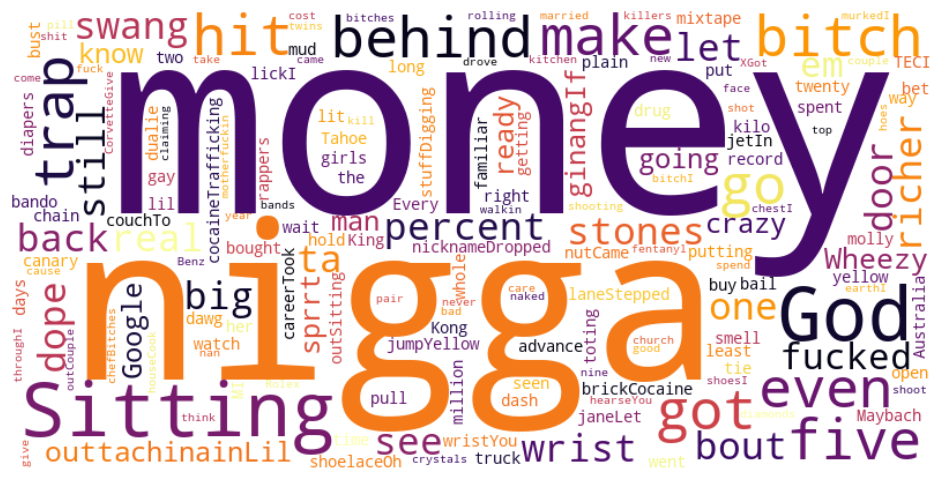

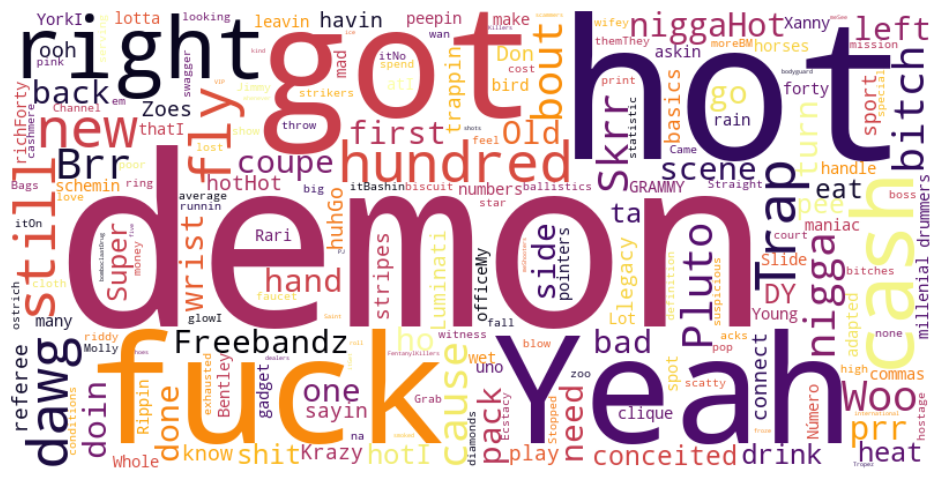

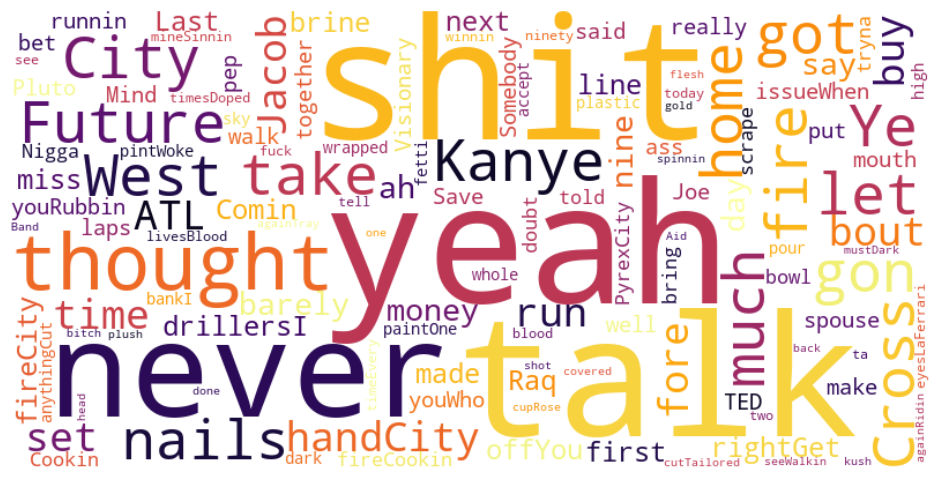

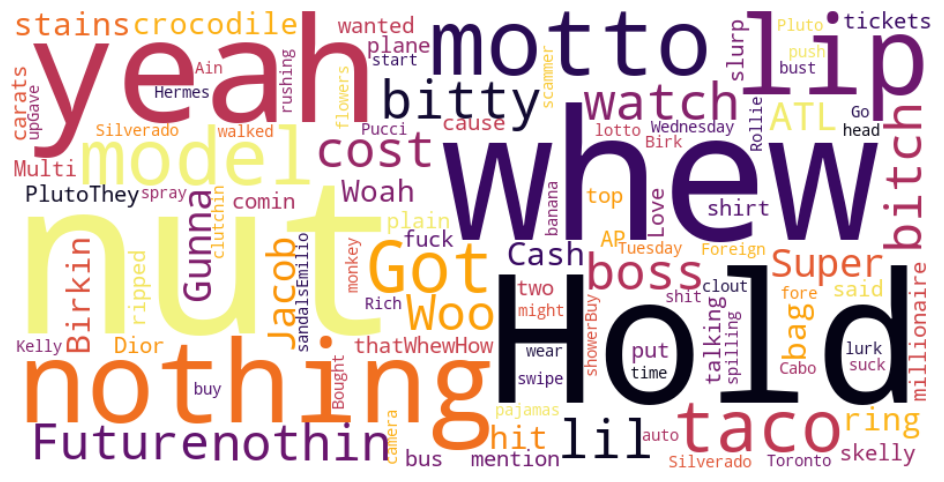

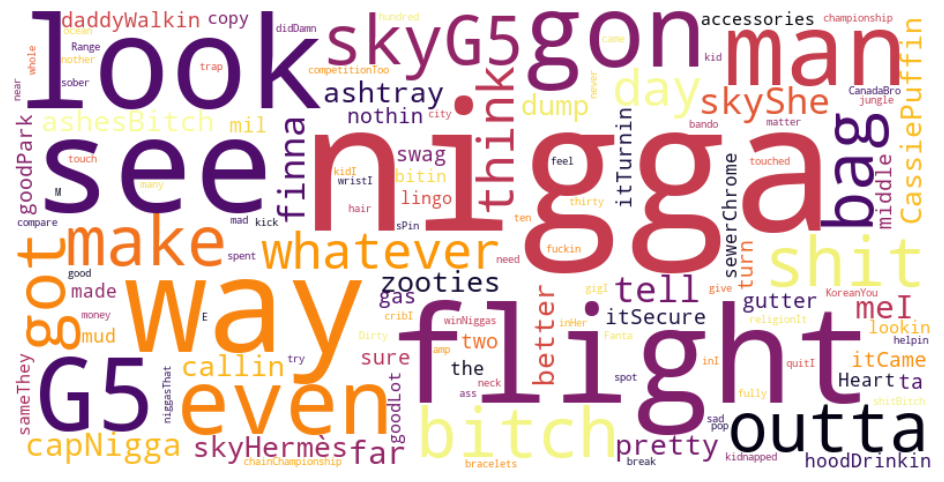

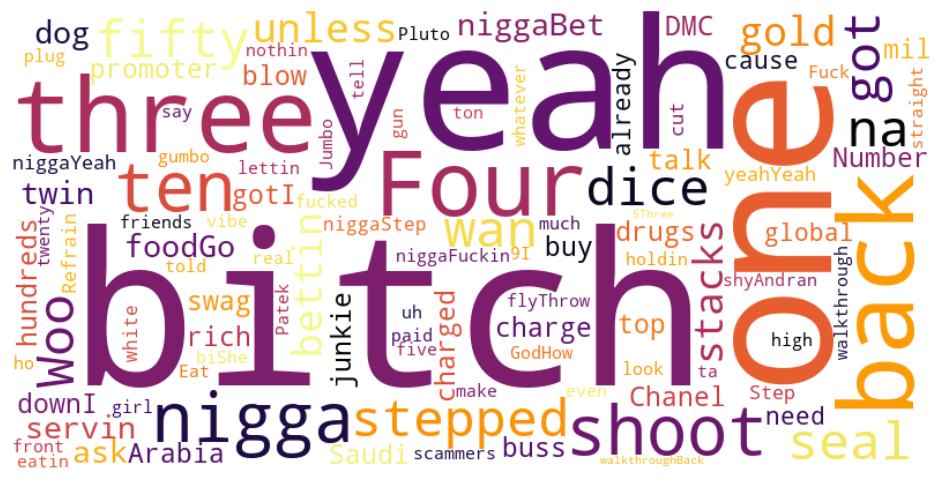

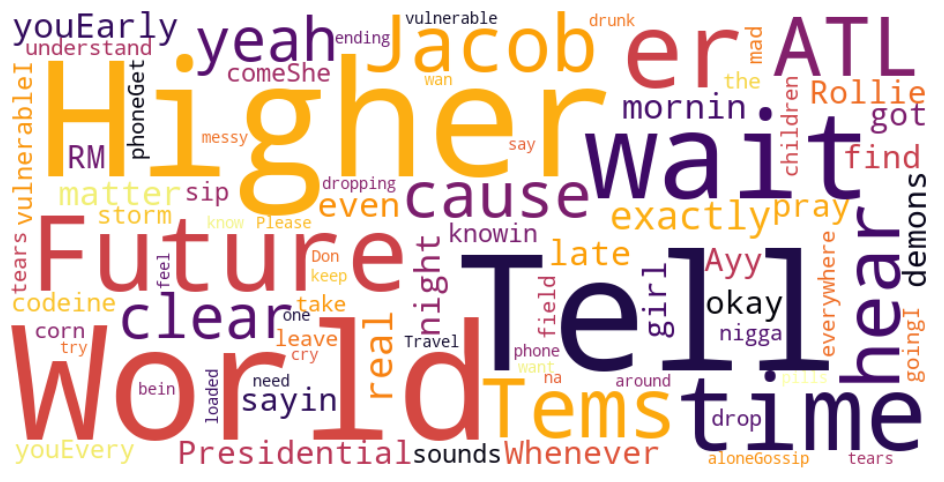

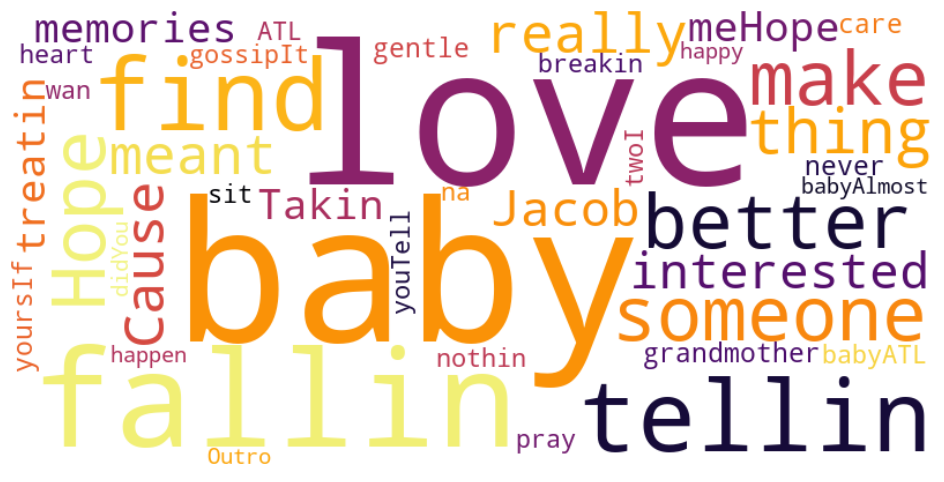

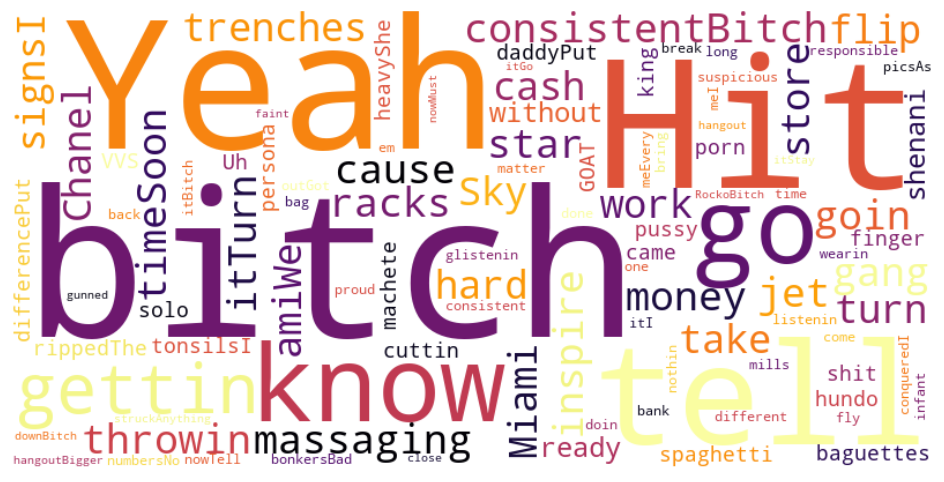

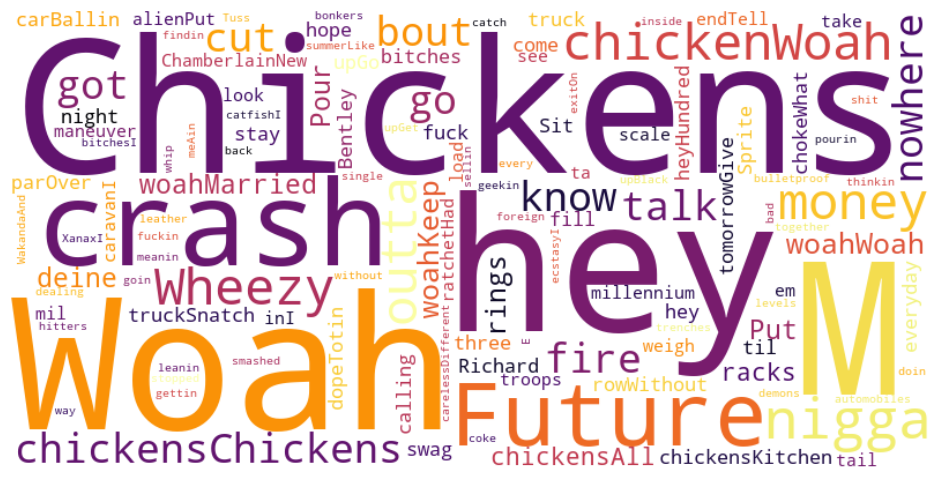

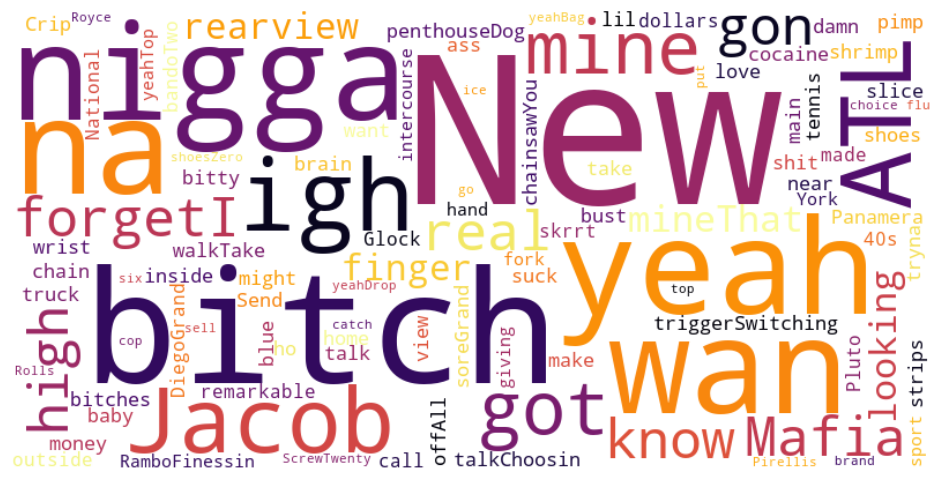

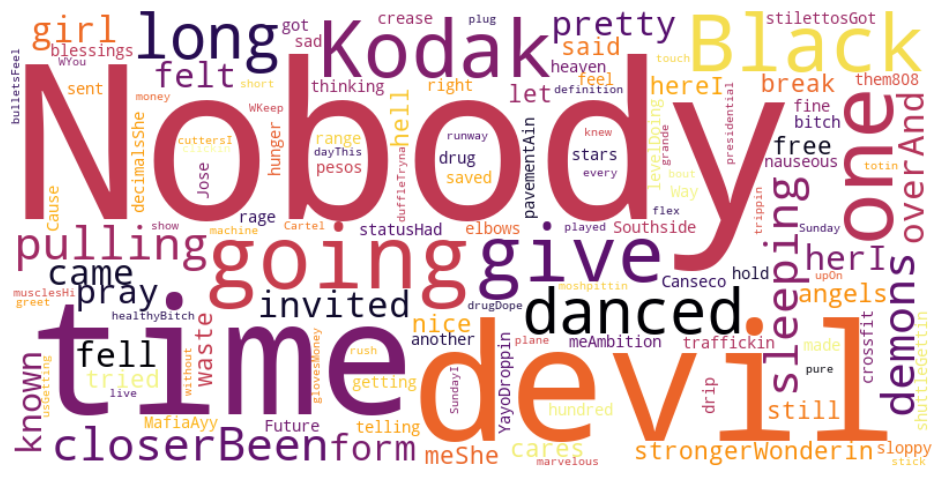

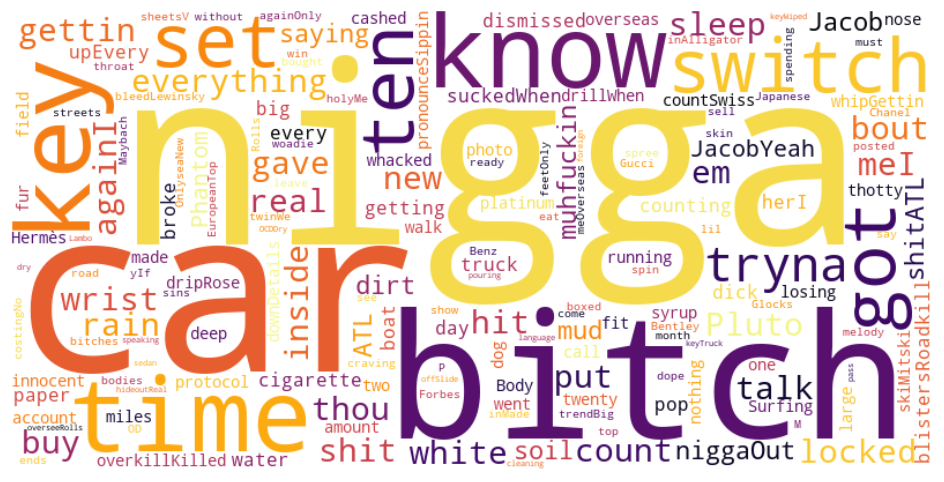

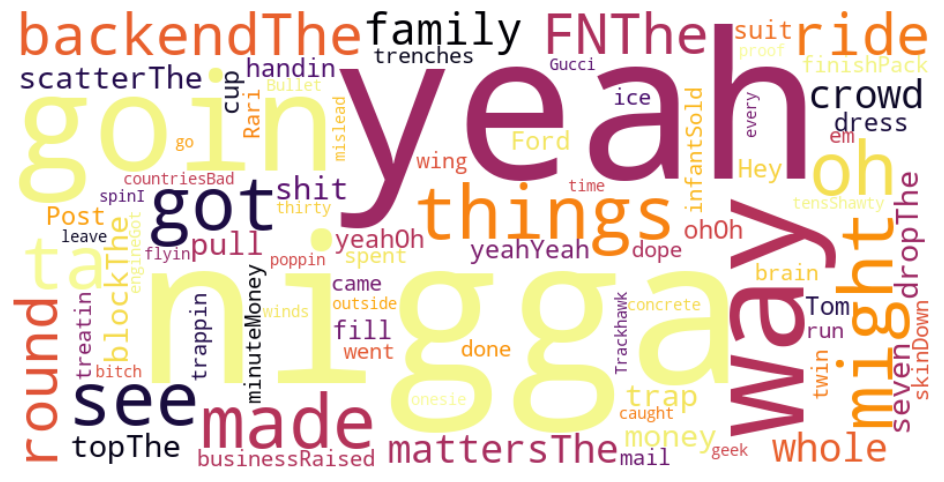

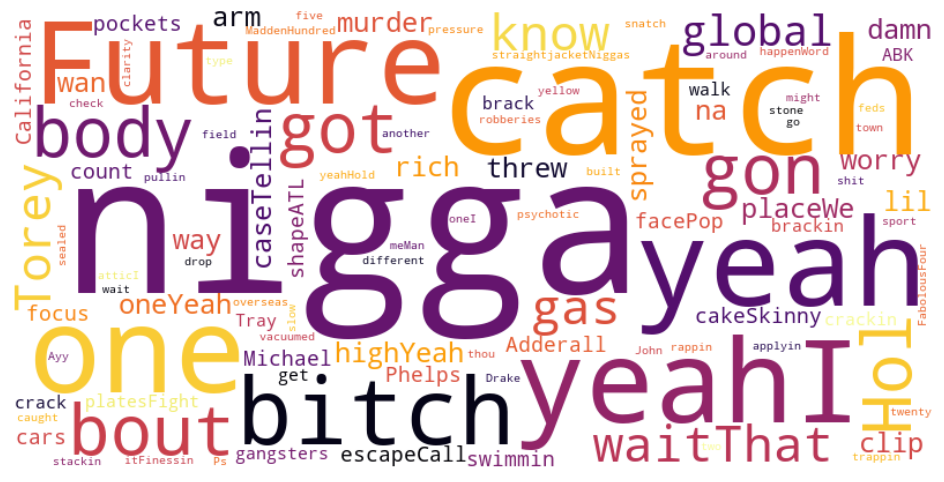

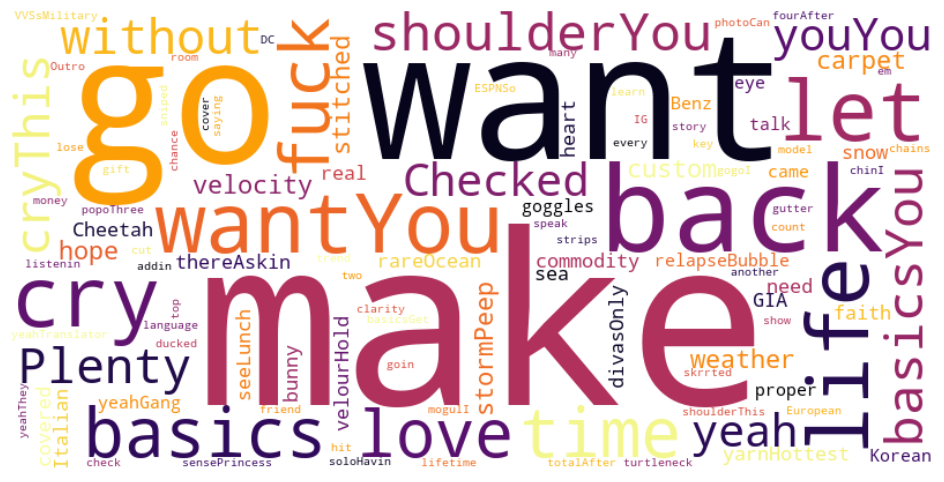

In [167]:
for i in range(0,16): # the len of the column in the df
    wc = WordCloud(width=800, height=400, max_words=200, background_color='white', colormap='inferno') # setting colors and size
    key_words = " ".join(df["key_words"][i]) # i would mean the location of the row we are plotting
    cloud = wc.generate(key_words)
    plt.figure(figsize=(12,6))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

An now you have a brief description of what each song of the album is about 